In [1]:
import cv2
from matplotlib import pyplot as plt

def apply_canny(filename):
  
    img = cv2.imread(filename)  # Read image
  
    # Defining all the parameters
    t_lower = 1 # Lower Threshold
    t_upper = 1130 # Upper threshold
    aperture_size = 3 # Aperture size
    L2Gradient = True # Boolean

    # Applying the Canny Edge filter 
    # with Aperture Size and L2Gradient
    edge = cv2.Canny(img, t_lower, t_upper, L2gradient = L2Gradient )

    plt.imshow(edge)
    plt.title('canny')
    plt.xticks([]), plt.yticks([])  
    plt.show()

    # return edge

def apply_downsampling(filename):
    img = cv2.imread(filename)
    
    r_img = cv2.resize(img, (224, 244), interpolation = cv2.INTER_CUBIC)

    plt.imshow(r_img)
    plt.title('downsampling')
    plt.xticks([]), plt.yticks([])  
    plt.show()

In [2]:
def apply_sift(origin, destination):
    imgOrigin = cv2.imread(origin)
    imgDestination = cv2.imread(destination)
    
    grayO = cv2.cvtColor(imgOrigin, cv2.COLOR_BGR2GRAY)
    grayD = cv2.cvtColor(imgDestination, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    
    keypointsO, descriptorsO = sift.detectAndCompute(imgOrigin, None)
    keypointsD, descriptorsD = sift.detectAndCompute(imgDestination, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)
    
    matches = bf.match(descriptorsO,descriptorsD)
    
    print(f'Number of keypoints:{len(keypointsO)} \n Number of matches: {len(matches)} \n Percentage of matches {(len(matches) / len(keypointsO) *100)}%')
    
    matches = sorted(matches, key = lambda x:x.distance)
    
    matched_img = cv2.drawMatches(imgOrigin, keypointsO, imgDestination, keypointsD, matches[:50], imgDestination, flags=2)

    
    # show the image
    plt.imshow(matched_img)
    plt.title('sift image')
    plt.xticks([]), plt.yticks([])  
    plt.show()


In [3]:
def laplacian_of_gaussian(src, sigma):

    image = cv2.imread(src)

    blurred = cv2.GaussianBlur(image, (0,0), sigma)
    
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    
    normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    plt.imshow(normalized)
    plt.title('Laplacian of Gaussian')
    plt.xticks([]), plt.yticks([])  
    plt.show()
    
    # return normalized

In [4]:
def difference_of_gaussian(src, sigma1, sigma2):

    image = cv2.imread(src)
    
    blurred1 = cv2.GaussianBlur(image, (0,0), sigma1)
    blurred2 = cv2.GaussianBlur(image, (0,0), sigma2)
    
    diff = blurred1 - blurred2
    
    normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    plt.imshow(normalized)
    plt.title('Difference of Gaussian')
    plt.xticks([]), plt.yticks([])  
    plt.show()
    
    # return normalized

In [24]:
def gaussian_pyramid_up_down(src, sequence):
    image = cv2.imread(src)
    for k in sequence:
        rows, cols, _channels = map(int, image.shape)
        
        cv2.imshow('Pyramids Demo', image)
        
        # k = cv2.waitKey(0)
        # if k == 27:
        #     break
            
        if k == 'u':
            image = cv2.pyrUp(image, dstsize=(2 * cols, 2 * rows))
            # print ('** Zoom In: Image x 2')
            
        elif k == 'd':
            image = cv2.pyrDown(image, dstsize=(cols // 2, rows // 2))
            # print ('** Zoom Out: Image / 2')

    cv2.destroyAllWindows()

    plt.imshow(image)
    plt.title('Gaussian Pyramid: ' + sequence)
    plt.xticks([]), plt.yticks([])  
    plt.show()

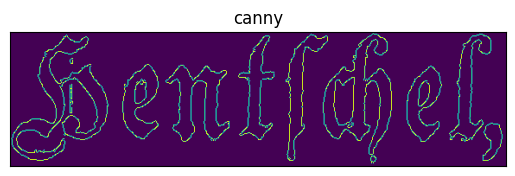

In [25]:
apply_canny("./dataset/Kanzlei/Kolonie-Zeitung-1865-08-12_P03_r1_line0000_word0002.png")

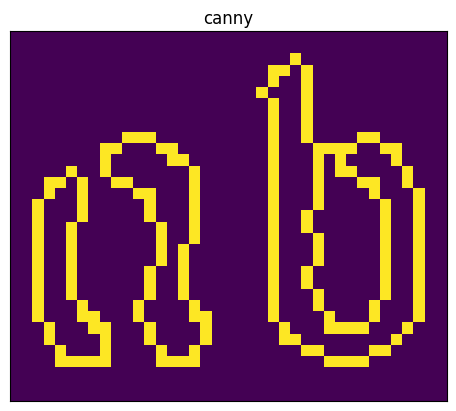

In [26]:
apply_canny("./dataset/Fraktur/Der-Pionier-1887-07-02_P03_r1_line0069_word0006.png")

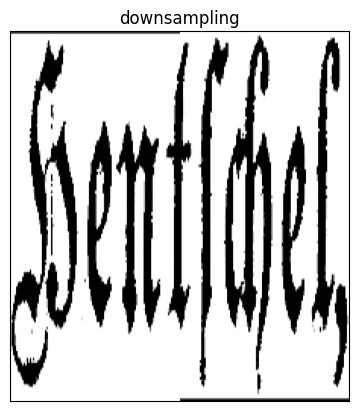

In [27]:
apply_downsampling("./dataset/Kanzlei/Kolonie-Zeitung-1865-08-12_P03_r1_line0000_word0002.png")

Numeber of keypoints:35 
 Number of matches: 27 
 Percentage of matches 77.14285714285715%


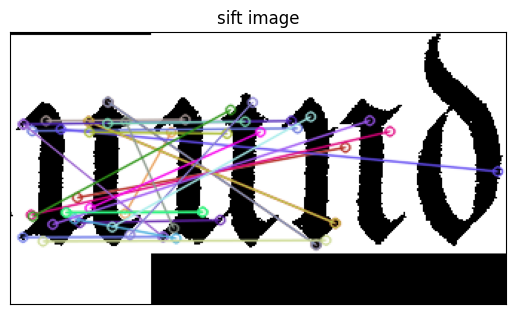

In [28]:
apply_sift("./dataset/alfabeto/u.png","./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png")

Numeber of keypoints:34 
 Number of matches: 20 
 Percentage of matches 58.82352941176471%


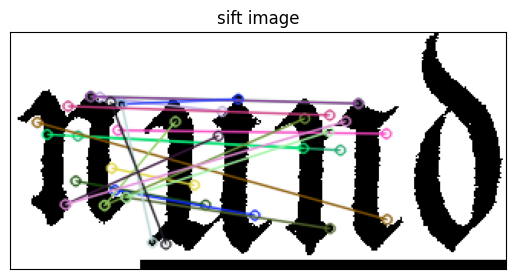

In [29]:
apply_sift("./dataset/alfabeto/n.png","./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png")

Numeber of keypoints:22 
 Number of matches: 14 
 Percentage of matches 63.63636363636363%


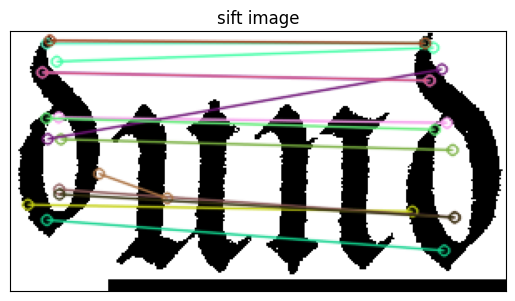

In [30]:
apply_sift("./dataset/alfabeto/d.png","./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png")

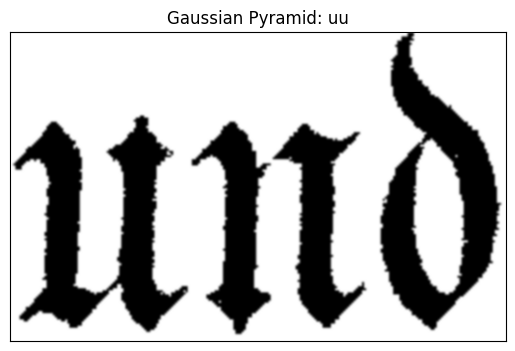

In [31]:
gaussian_pyramid_up_down("./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png", "uu")

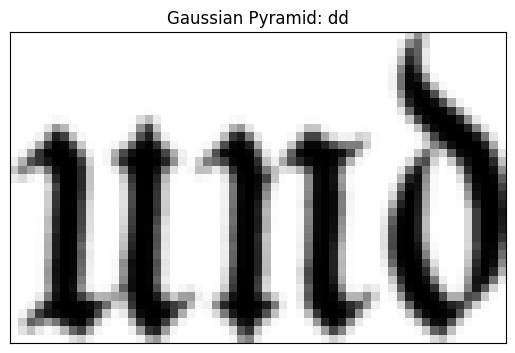

In [32]:
gaussian_pyramid_up_down("./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png", "dd")

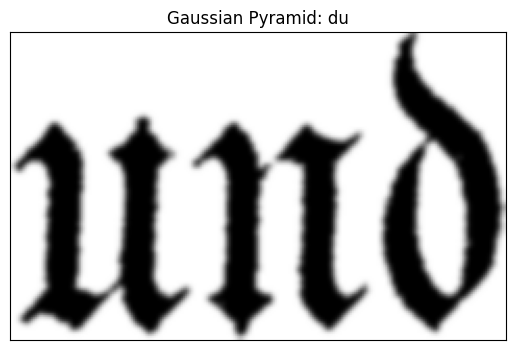

In [33]:
gaussian_pyramid_up_down("./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png", "du")

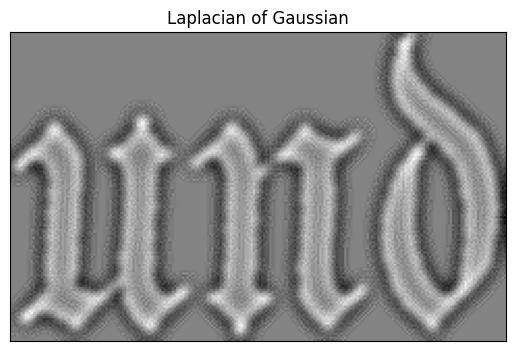

In [34]:
laplacian_of_gaussian("./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png", 3)

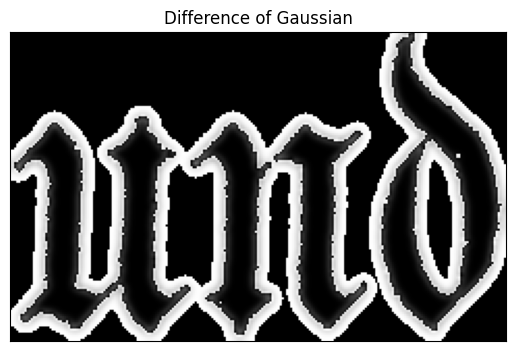

In [35]:
difference_of_gaussian("./dataset/Kanzlei/Kolonie-Zeitung-1868-08-01_P03_r1_line0002_word0001.png", 2, 1)